In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
sst = pd.read_csv('filtered_sst.csv')

In [3]:
sst.head()

,lat,lon,time,nbnds,time_bnds,sst
0,64.0,300.0,1854-01-01,0,9.969210e+36,-1.8
1,64.0,300.0,1854-01-01,1,9.969210e+36,-1.8
2,64.0,300.0,1854-02-01,0,9.969210e+36,-1.8
3,64.0,300.0,1854-02-01,1,9.969210e+36,-1.8
4,64.0,300.0,1854-03-01,0,9.969210e+36,-1.8


In [4]:
sst.describe()

,lat,lon,nbnds,time_bnds,sst
count,945300.000000,945300.000000,945300.0,9.453000e+05,908310.000000
mean,55.000000,322.000000,0.5,9.969210e+36,8.206754
std,5.744566,13.266506,0.5,0.000000e+00,4.699789
min,46.000000,300.000000,0.0,9.969210e+36,-1.800000
25%,50.000000,310.000000,0.0,9.969210e+36,4.787121
50%,55.000000,322.000000,0.5,9.969210e+36,8.429157
75%,60.000000,334.000000,1.0,9.969210e+36,11.701467
max,64.000000,344.000000,1.0,9.969210e+36,22.972065


In [5]:
#find mean for each year
# First, make sure the 'time' column is in datetime format
sst['time'] = pd.to_datetime(sst['time'])

# Now, extract the year
sst['year'] = sst['time'].dt.year

# Display the modified dataframe
print(sst[['time', 'year']].head())

        time  year
0 1854-01-01  1854
1 1854-01-01  1854
2 1854-02-01  1854
3 1854-02-01  1854
4 1854-03-01  1854


In [6]:
#group by year and find mean sst
sst.groupby('year').mean()

,lat,lon,time,nbnds,time_bnds,sst
year,,,,,,
1854,55.0,322.0,1854-06-16 11:59:59.999999488,0.5,9.969210e+36,8.539829
1855,55.0,322.0,1855-06-16 12:00:00.000000000,0.5,9.969210e+36,8.311174
1856,55.0,322.0,1856-06-16 08:00:00.000000000,0.5,9.969210e+36,8.169632
1857,55.0,322.0,1857-06-16 11:59:59.999999488,0.5,9.969210e+36,8.205149
1858,55.0,322.0,1858-06-16 12:00:00.000000000,0.5,9.969210e+36,8.091995
...,...,...,...,...,...,...
2021,55.0,322.0,2021-06-16 12:00:00.000000000,0.5,9.969210e+36,8.652396
2022,55.0,322.0,2022-06-16 12:00:00.000000000,0.5,9.969210e+36,8.659582
2023,55.0,322.0,2023-06-16 12:00:00.000000000,0.5,9.969210e+36,9.006946


In [10]:
sst.isna().sum()

lat              0
lon              0
time             0
nbnds            0
time_bnds        0
sst          36990
year             0
dtype: int64

In [16]:
# Remove rows where lat = 64, lon between 312 and 318, and time between 1854 and 2025
sst_cleaned = sst[~((sst['lat'] == 64) & (sst['lon'] >= 312) & (sst['lon'] <= 318) & (sst['time'] >= '1854-01-01') & (sst['time'] <= '2025-03-01'))]


In [17]:
sst_cleaned = sst_cleaned[~((sst_cleaned['lat'] == 62) & (sst_cleaned['lon'] >= 314) & (sst_cleaned['lon'] <= 316) & (sst_cleaned['time'] >= '1854-01-01') & (sst_cleaned['time'] <= '2025-03-01'))]


In [19]:
sst_cleaned = sst_cleaned[~((sst_cleaned['lat'] == 54) & (sst_cleaned['lon'] >= 300) & (sst_cleaned['lon'] <= 302) & (sst_cleaned['time'] >= '1854-01-01') & (sst_cleaned['time'] <= '2025-03-01'))]


In [21]:
sst_cleaned = sst_cleaned[~((sst_cleaned['lat'] == 52) & (sst_cleaned['lon'] >= 300) & (sst_cleaned['lon'] <= 302) & (sst_cleaned['time'] >= '1854-01-01') & (sst_cleaned['time'] <= '2025-03-01'))]


In [22]:
sst_cleaned.isna().sum()

lat          0
lon          0
time         0
nbnds        0
time_bnds    0
sst          0
year         0
dtype: int64

In [23]:
#try PCA
# Select the relevant columns (e.g., lat, lon, sst)
features = sst_cleaned[['lat', 'lon', 'sst']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)  # You can choose the number of components
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [24]:
print(pca.explained_variance_ratio_)


[0.59513637 0.33714637]


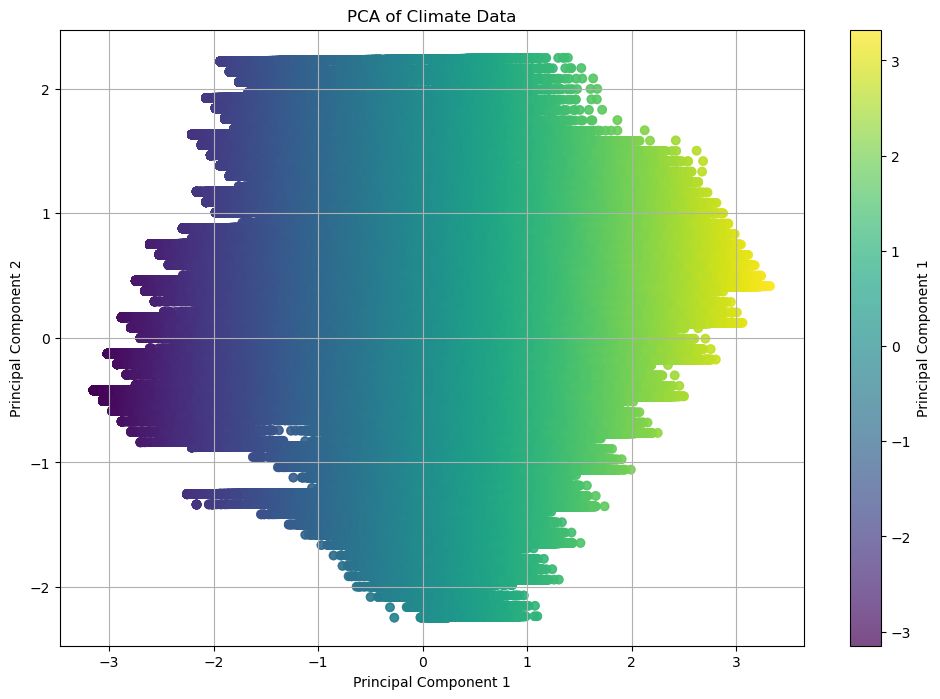

In [32]:
# Create the plot with a larger size
plt.figure(figsize=(12, 8))

# Color by Principal Component 1 (PC1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=principal_components[:, 0], cmap='viridis', alpha=0.7)

# Add colorbar to indicate the range of PC1 values
plt.colorbar(label='Principal Component 1')

plt.title('PCA of Climate Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Show the plot
plt.show()
